In [13]:
import mne
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

## Load and visualize first epoch

### Load first epoch

In [14]:
# Label mapping: merge artifacts with base classes
label_map = {
    "w": 0,
    "1": 0,  # Wake
    "n": 1,
    "2": 1,  # NREM/SWS
    "r": 2,
    "3": 2,  # REM
}

epoch_duration = 4. # seconds

# Load EDF file
raw = mne.io.read_raw_edf("./../data/CohortB/recordings/B1.edf", preload=True, verbose=False
)
sfreq = raw.info["sfreq"]

# Calculate samples per epoch
samples_per_epoch = int(epoch_duration * sfreq)

# Example: Load data for the first epoch
epoch_idx = 0
start_sample = epoch_idx * samples_per_epoch
end_sample = start_sample + samples_per_epoch

data = raw.get_data(start=start_sample, stop=end_sample)  # Shape: (3, samples_per_epoch)

# Load label for this epoch (first expert, first column)
labels_df = pd.read_csv("./../data/CohortB/scorings/B1.csv")

label_str = str(labels_df.iloc[epoch_idx, 0])
label = label_map.get(label_str) # Map to 0, 1, 2 (Wake, NREM, REM)

print(f"Data shape: {data.shape}, Label: {label}") 

Data shape: (3, 512), Label: 0


### Visualize first epoch

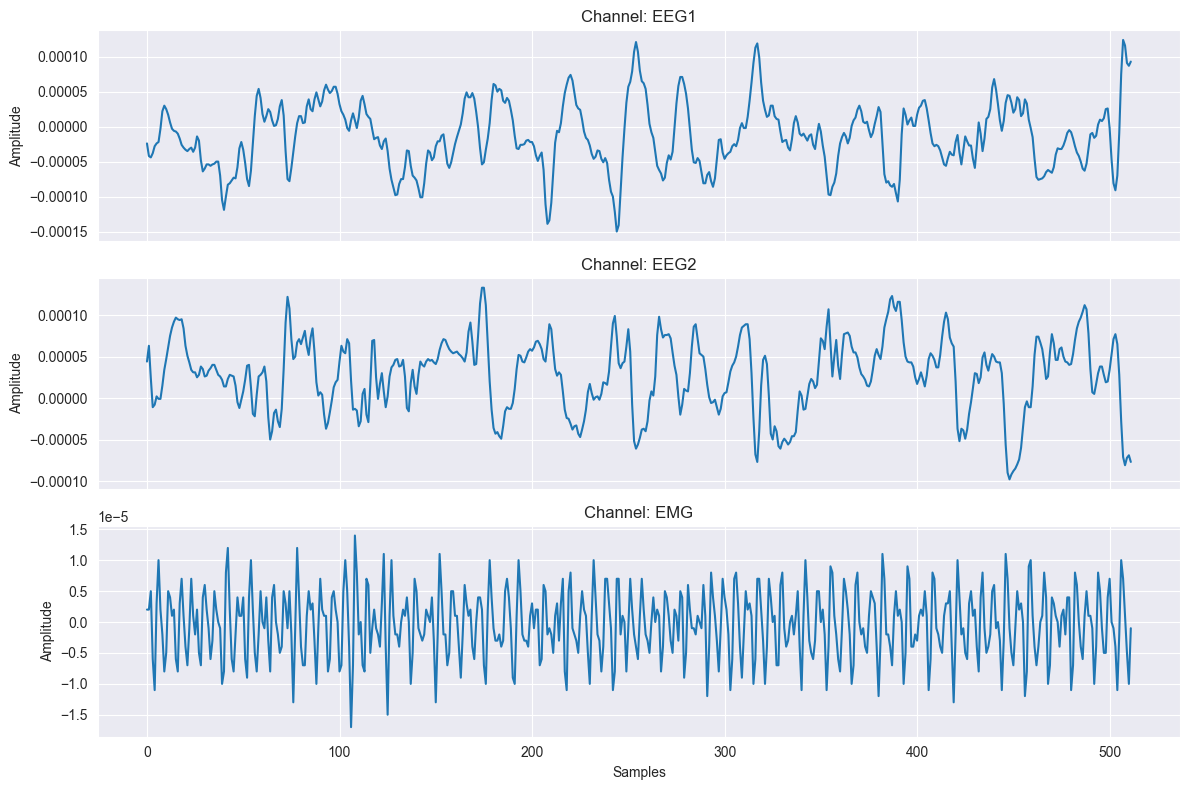

In [15]:
import matplotlib.pyplot as plt

# Plot the first epoch of data
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
channel_names = raw.info['ch_names'][:3]  # Get the names of the first 3 channels
for i in range(3):
    axs[i].plot(data[i])
    axs[i].set_title(f"Channel: {channel_names[i]}")
    axs[i].set_ylabel("Amplitude")
axs[2].set_xlabel("Samples")
plt.tight_layout()
plt.show()